<a href="https://colab.research.google.com/github/Tanvigadhiya7/Internship2020/blob/master/DS_pract_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


from google.colab import files

uploaded= files.upload()
import io


Saving diabetes.csv to diabetes (2).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

sample= pd.read_csv(io.StringIO(uploaded['diabetes.csv'].decode('utf-8')))

sample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
accuracy_score(Y_test,knn.predict(X_test))

NameError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c36b85a90>,
      dtype=object)

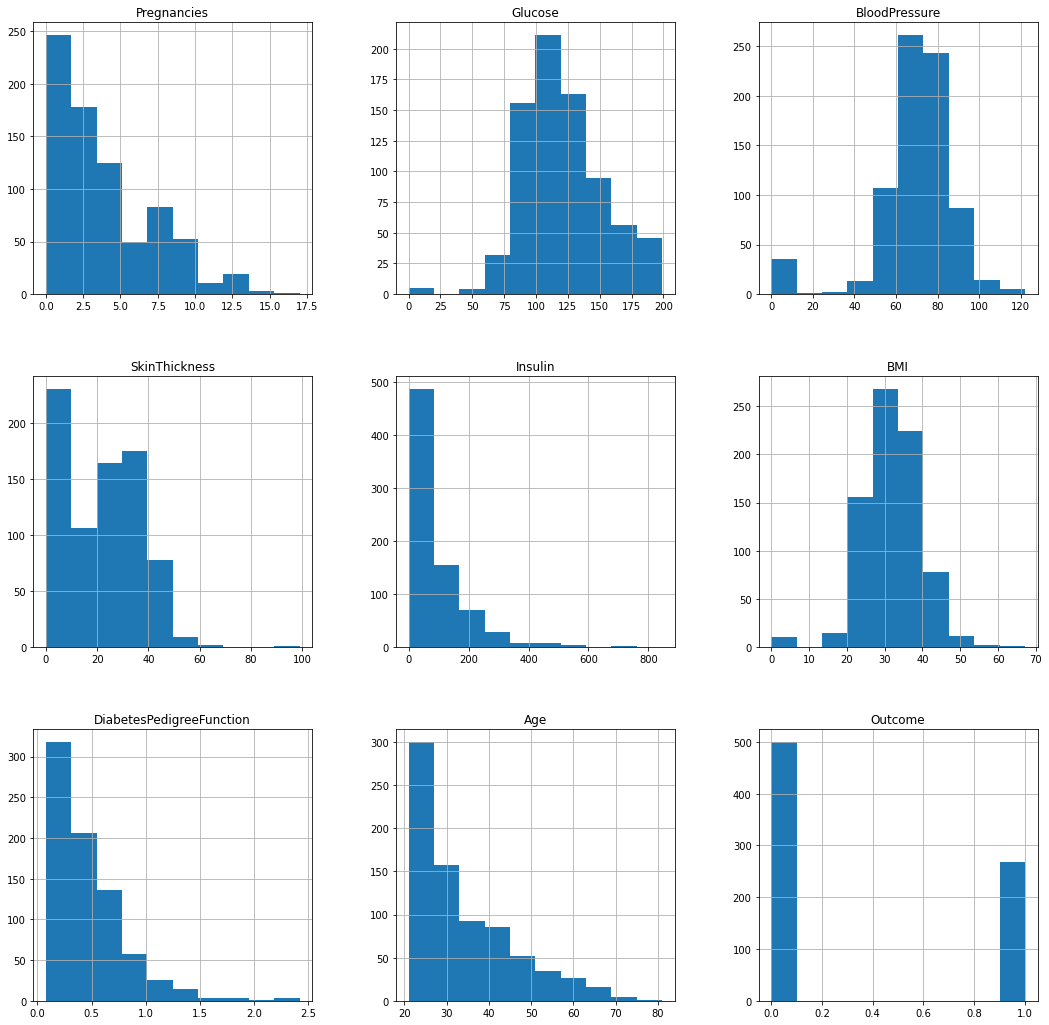

In [ ]:
sample.hist(figsize=[18,18])

In [ ]:
sample.fillna(sample.median(),inplace=True)
sample = sample.drop_duplicates()

In [ ]:
x=sample[['Pregnancies', 'Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI','DiabetesPedigreeFunction' ,	'Age'	,'Outcome']]
y = sample['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(sample,y,test_size=0.2)


knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
accuracy_score(Y_test,knn.predict(X_test))

0.7337662337662337

In [ ]:
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(X_train[['trestbps','chol','thalach']])
X_test_minmax=min_max.fit_transform(X_test[['trestbps','chol','thalach']])

In [ ]:
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(X_train[['Pregnancies','Glucose','BloodPressure', 'Age']])
X_test_minmax=min_max.fit_transform(X_test[['Pregnancies','Glucose','BloodPressure', 'Age']])

In [ ]:
enc=OneHotEncoder(sparse=False)
X_train_1=X_train
X_test_1=X_test
columns=[']
for col in columns:
    data=X_train[[col]].append(X_test[[col]])
    enc.fit(data)
    # Fitting One Hot Encoding on train data
    temp = enc.transform(X_train[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(X_train.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    X_train_1=pd.concat([X_train_1,temp],axis=1)
    # fitting One Hot Encoding on test data
    temp = enc.transform(X_test[[col]])
    # changing it into data frame and adding column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    # Setting the index for proper concatenation
    temp=temp.set_index(X_test.index.values)
    # adding the new One Hot Encoded varibales to test data frame
    X_test_1=pd.concat([X_test_1,temp],axis=1)
X_train_1.columns


X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)
log.fit(X_train_scale,Y_train)
accuracy_score(Y_test,log.predict(X_test_scale))